<a href="https://colab.research.google.com/github/KacioHenrique/investVisualization/blob/main/Oficial_of_Atividade_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade II - Análise Explanatória de Dados

Professor: Eronides Neto

efsn@cesar.school


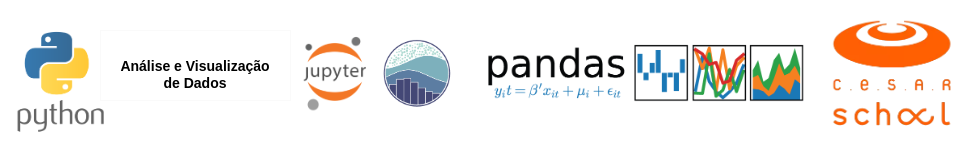

**Nome do Grupo**

*   Kacio Henrique Couto Batista (khcb@cesar.school)
*   CRISTIANO FREIRE TORRES  (cft@cesar.school)




Grupos de 01-05 pessoas.

Install Lib

In [65]:
! pip install python-bcb
! pip install yfinance

In [66]:
from bcb import TaxaJuros, sgs, currency
import pandas as pd
import plotly.express as px
import yfinance as yf

## Selic

In [67]:
START_DATE = START_DATE = '2014-01-02'
END_DATE = '2024-12-31'

In [68]:
selic = sgs.get({'selic':432}, start = START_DATE, end = END_DATE)
selic.head(100)

,selic
Date,
2014-01-02,10.0
2014-01-03,10.0
2014-01-04,10.0
2014-01-05,10.0
2014-01-06,10.0
...,...
2014-04-07,11.0
2014-04-08,11.0
2014-04-09,11.0


In [69]:
selic.tail()

,selic
Date,
2024-12-27,12.25
2024-12-28,12.25
2024-12-29,12.25
2024-12-30,12.25
2024-12-31,12.25


In [70]:
def date_to_month(db):
  months = range(1, 13)
  years = range(2014, 2025)

  result = []
  for year in years:
    for month in months:
      month_mean = db[(db['Date'].dt.month == month) & (db['Date'].dt.year == year)]['selic'].mean()
      result.append({'year-month': f'{year}-{month}', 'month_selic': month_mean})

  return pd.DataFrame(data= result, columns= ['year-month','month_selic'])


In [71]:
selic.reset_index(inplace=True)

In [72]:
selic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4017 non-null   datetime64[ns]
 1   selic   4017 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.9 KB


In [73]:
START_VALUE = 100000

def income_selic(selic_percentages):
  result = START_VALUE
  values = [START_VALUE]
  for percentage in selic_percentages:
    result = result * (1 + (percentage/12)/100)
    values.append(result)
  return values

In [74]:
selic_month_icome = date_to_month(selic)
selic_month_icome

,year-month,month_selic
0,2014-1,10.266667
1,2014-2,10.517857
2,2014-3,10.750000
3,2014-4,10.983333
4,2014-5,11.000000
...,...,...
127,2024-8,10.500000
128,2024-9,10.600000
129,2024-10,10.750000
130,2024-11,11.150000


In [75]:
income_selic(selic_month_icome['month_selic'])
selic_month_icome['value'] = pd.Series(income_selic(selic_month_icome['month_selic']))
selic_month_icome

,year-month,month_selic,value
0,2014-1,10.266667,100000.000000
1,2014-2,10.517857,100855.555556
2,2014-3,10.750000,101739.542493
3,2014-4,10.983333,102650.959228
4,2014-5,11.000000,103590.500647
...,...,...,...
127,2024-8,10.500000,273297.981759
128,2024-9,10.600000,275689.339099
129,2024-10,10.750000,278124.594928
130,2024-11,11.150000,280616.127757


In [76]:
px.line(selic_month_icome, x='year-month', y='value', title='Selic')

## Cripto Coin

In [77]:
real_dolar = pd.DataFrame(yf.Ticker("BRL=X").history(period="max")["Close"]).reset_index()
real_dolar

,Date,Close
0,2003-12-01 00:00:00+00:00,2.9230
1,2003-12-02 00:00:00+00:00,2.9310
2,2003-12-03 00:00:00+00:00,2.9310
3,2003-12-04 00:00:00+00:00,2.9430
4,2003-12-05 00:00:00+00:00,2.9340
...,...,...
5081,2025-02-07 00:00:00+00:00,5.7605
5082,2025-02-10 00:00:00+00:00,5.8032
5083,2025-02-11 00:00:00+00:00,5.7869
5084,2025-02-12 00:00:00+00:00,5.7645


In [78]:
real_dolar[real_dolar['Date'] == '2003-12-01 00:00:00+00:00']['Close'].values[0]

2.9230000972747803

In [79]:
real_dolar['Date'] = real_dolar['Date'].dt.date
real_dolar

,Date,Close
0,2003-12-01,2.9230
1,2003-12-02,2.9310
2,2003-12-03,2.9310
3,2003-12-04,2.9430
4,2003-12-05,2.9340
...,...,...
5081,2025-02-07,5.7605
5082,2025-02-10,5.8032
5083,2025-02-11,5.7869
5084,2025-02-12,5.7645


In [80]:
real_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5086 non-null   object 
 1   Close   5086 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.6+ KB


In [123]:
def dolar_to_real(date, value):
  return real_dolar[real_dolar['Date'] >= date.date()]['Close'].values[0] * value

In [147]:
dolar_to_real(pd.to_datetime('2025-02-07'), 1)

5.760499954223633

In [125]:
def makeCoinData(ticker, period):
  db = yf.download(tickers= ticker, period= period).reset_index()
  data = {'date': db['Date'].tolist(), 'values': db['Close'][ticker].to_list()}
  generate_db = pd.DataFrame(data)
  generate_db['real_value'] = generate_db[['date', 'values']].apply(lambda x: dolar_to_real(x['date'], x['values']), axis=1)
  return generate_db

In [133]:
btc = makeCoinData('BTC-USD', 'max')
btc

[*********************100%***********************]  1 of 1 completed


,date,values,real_value
0,2014-09-17,457.334015,1067.280364
1,2014-09-18,424.440002,999.683516
2,2014-09-19,394.795990,932.981864
3,2014-09-20,408.903992,967.057944
4,2014-09-21,398.821014,943.211703
...,...,...,...
3798,2025-02-09,96500.093750,560009.321668
3799,2025-02-10,97437.554688,565449.594763
3800,2025-02-11,95747.429688,554080.805022
3801,2025-02-12,97885.859375,564263.050183


In [134]:
btc[btc['date'] == '2014-09-20']

,date,values,real_value
3,2014-09-20,408.903992,967.057944


In [148]:
fig = px.line(makeCoinData('BTC-USD', 'max'), x='date', y='real_value', title='BTC')
fig.update_traces(line=dict(color='Orange'))
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Valor',
    title_font=dict(size=24, family='Arial', color='Orange'),
    template='plotly_dark',  # Tema escuro
    margin=dict(l=40, r=40, t=60, b=40),
)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [135]:
px.line(makeCoinData('ETH-USD', 'max'), x='date', y='real_value', title='ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [136]:
px.line(makeCoinData('SOL-USD', 'max'), x='date', y='real_value', title='SOL-USD')

[*********************100%***********************]  1 of 1 completed


In [138]:
px.line(makeCoinData('^GSPC', '5y'), x='date', y='real_value', title='SP5T5')

[*********************100%***********************]  1 of 1 completed


In [139]:
px.line(makeCoinData('^IBX50', '5y'), x='date', y='real_value', title='IBX50')

[*********************100%***********************]  1 of 1 completed
